# Perform SED fitting to individual spatial bins

After pixel binning and generating model rest-frame spectra, we are ready to perform SED fitting to individual spatial bins. This can be done using `SEDfit_from_binmap` function. API information of this function can be seen at [link](https://pixedfit.readthedocs.io/en/latest/piXedfit_fitting.html#).

In [1]:
import numpy as np
from astropy.io import fits

## Run SED fitting to spatial bins in the galaxy

In [2]:
from piXedfit.piXedfit_fitting import SEDfit_from_binmap

# get redshift. This can be taken from the header information of binned fluxmap FITS file
# get number of spatial bins. This can also be taken from the header. 
# file name for the binned fluxmap FITS file
fits_binmap = "pixbin_fluxmap.fits"
hdu = fits.open(fits_binmap)
nbins = int(hdu[0].header['nbins'])
gal_z = float(hdu[0].header['z'])
hdu.close()

# File containing rest-frame model spectra
models_spec = "models/model_specs.hdf5"

# IGM absoption modeling
add_igm_absorption = 1     # turn on IGM absorption modeling 
igm_type = 1               # Inoue et al. (2014) model   

# define priors
from piXedfit.piXedfit_fitting import priors

# get maximum age at the redshift of the galaxy. This information will be used for defining range of age.
# To take into account for the redshift uncertainty, we shift the redshift down by -0.3 to get wider age range.
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70.0, Om0=0.3)
age_univ = cosmo.age(gal_z-0.3)
max_log_age = np.log10(age_univ.value)

# define the ranges of the parameters
# we will fix the ionization parameter to log(U)=-2.0
ranges = {'log_age':[-1.0,max_log_age], 'gas_logu':[-2.0,-2.0]}
pr = priors(ranges)
params_ranges = pr.params_ranges()

# define the shape of the priors. Here we use uniform (i.e., flat) prior over the defined ranges.
prior1 = pr.uniform('log_age')
prior2 = pr.uniform('gas_logu')
params_priors = [prior1, prior2]

# Range of the spatial bin ids to be fit. Leaving it as None, will fit all the spatial bins in a sequence (not in parallel).
# Note that this ID range start from zero. This means that spatial bin with bin index=1 equal to id of zero in this case.
binid_range = [0,3]
# to run fitting to all bins (it takes a while to finish)
#binid_range = [0,nbins]

# fitting method to be used: MCMC
fit_method = 'mcmc'
nwalkers = 100        # number of MCMC walkers
nsteps = 600          # number of steps per walker

# number of cores to be used in the calculation process
nproc = 5

SEDfit_from_binmap(fits_binmap, binid_range=binid_range, models_spec=models_spec, params_ranges=params_ranges, params_priors=params_priors,
                   free_z=0, gal_z=gal_z, fit_method=fit_method, nproc=nproc, nwalkers=nwalkers, nsteps=nsteps, cosmo=0, H0=70.0, Om0=0.3, 
                   add_igm_absorption=add_igm_absorption, igm_type=igm_type, store_full_samplers=1)

## Check SED fitting results of some spatial bins

We can check the results of SED fitting of individual spatial bins using functions in the `piXedfit_analysis` [module](https://pixedfit.readthedocs.io/en/latest/piXedfit_analysis.html). Three diagnostic plots can be made: SED plot, corner plot, and star formation history (SFH) plot.

In [3]:
from piXedfit.piXedfit_analysis import plot_SED
from piXedfit.piXedfit_analysis import plot_corner
from piXedfit.piXedfit_analysis import plot_sfh_mcmc

### Fitting result of Bin index = 1

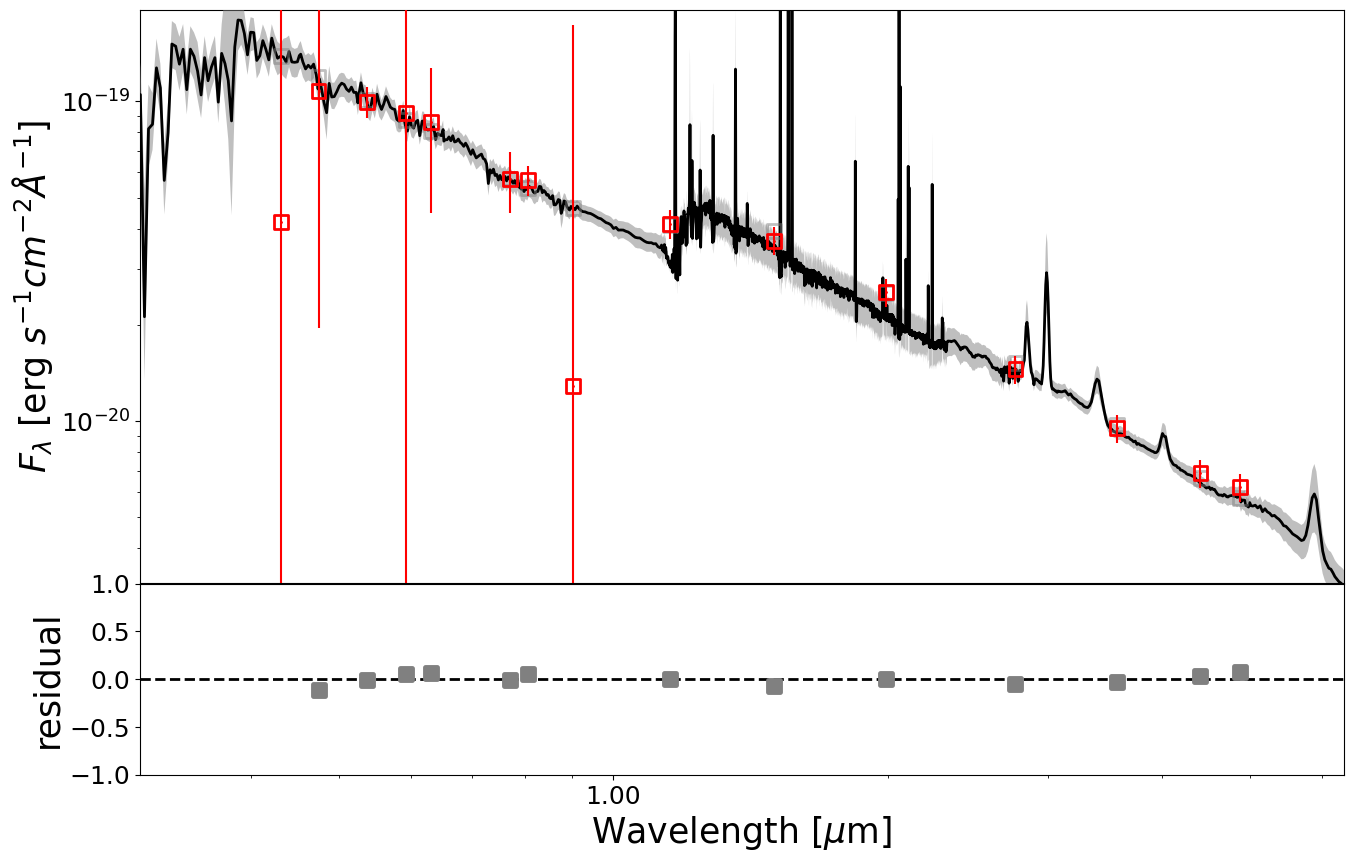

In [4]:
%matplotlib inline

name_sampler_fits = 'mcmc_bin1.fits'
plot_SED(name_sampler_fits, decompose=0)

Plotting posteriors probability distributions
=> Number of parameters: 9


'corner_mcmc_bin1.png'

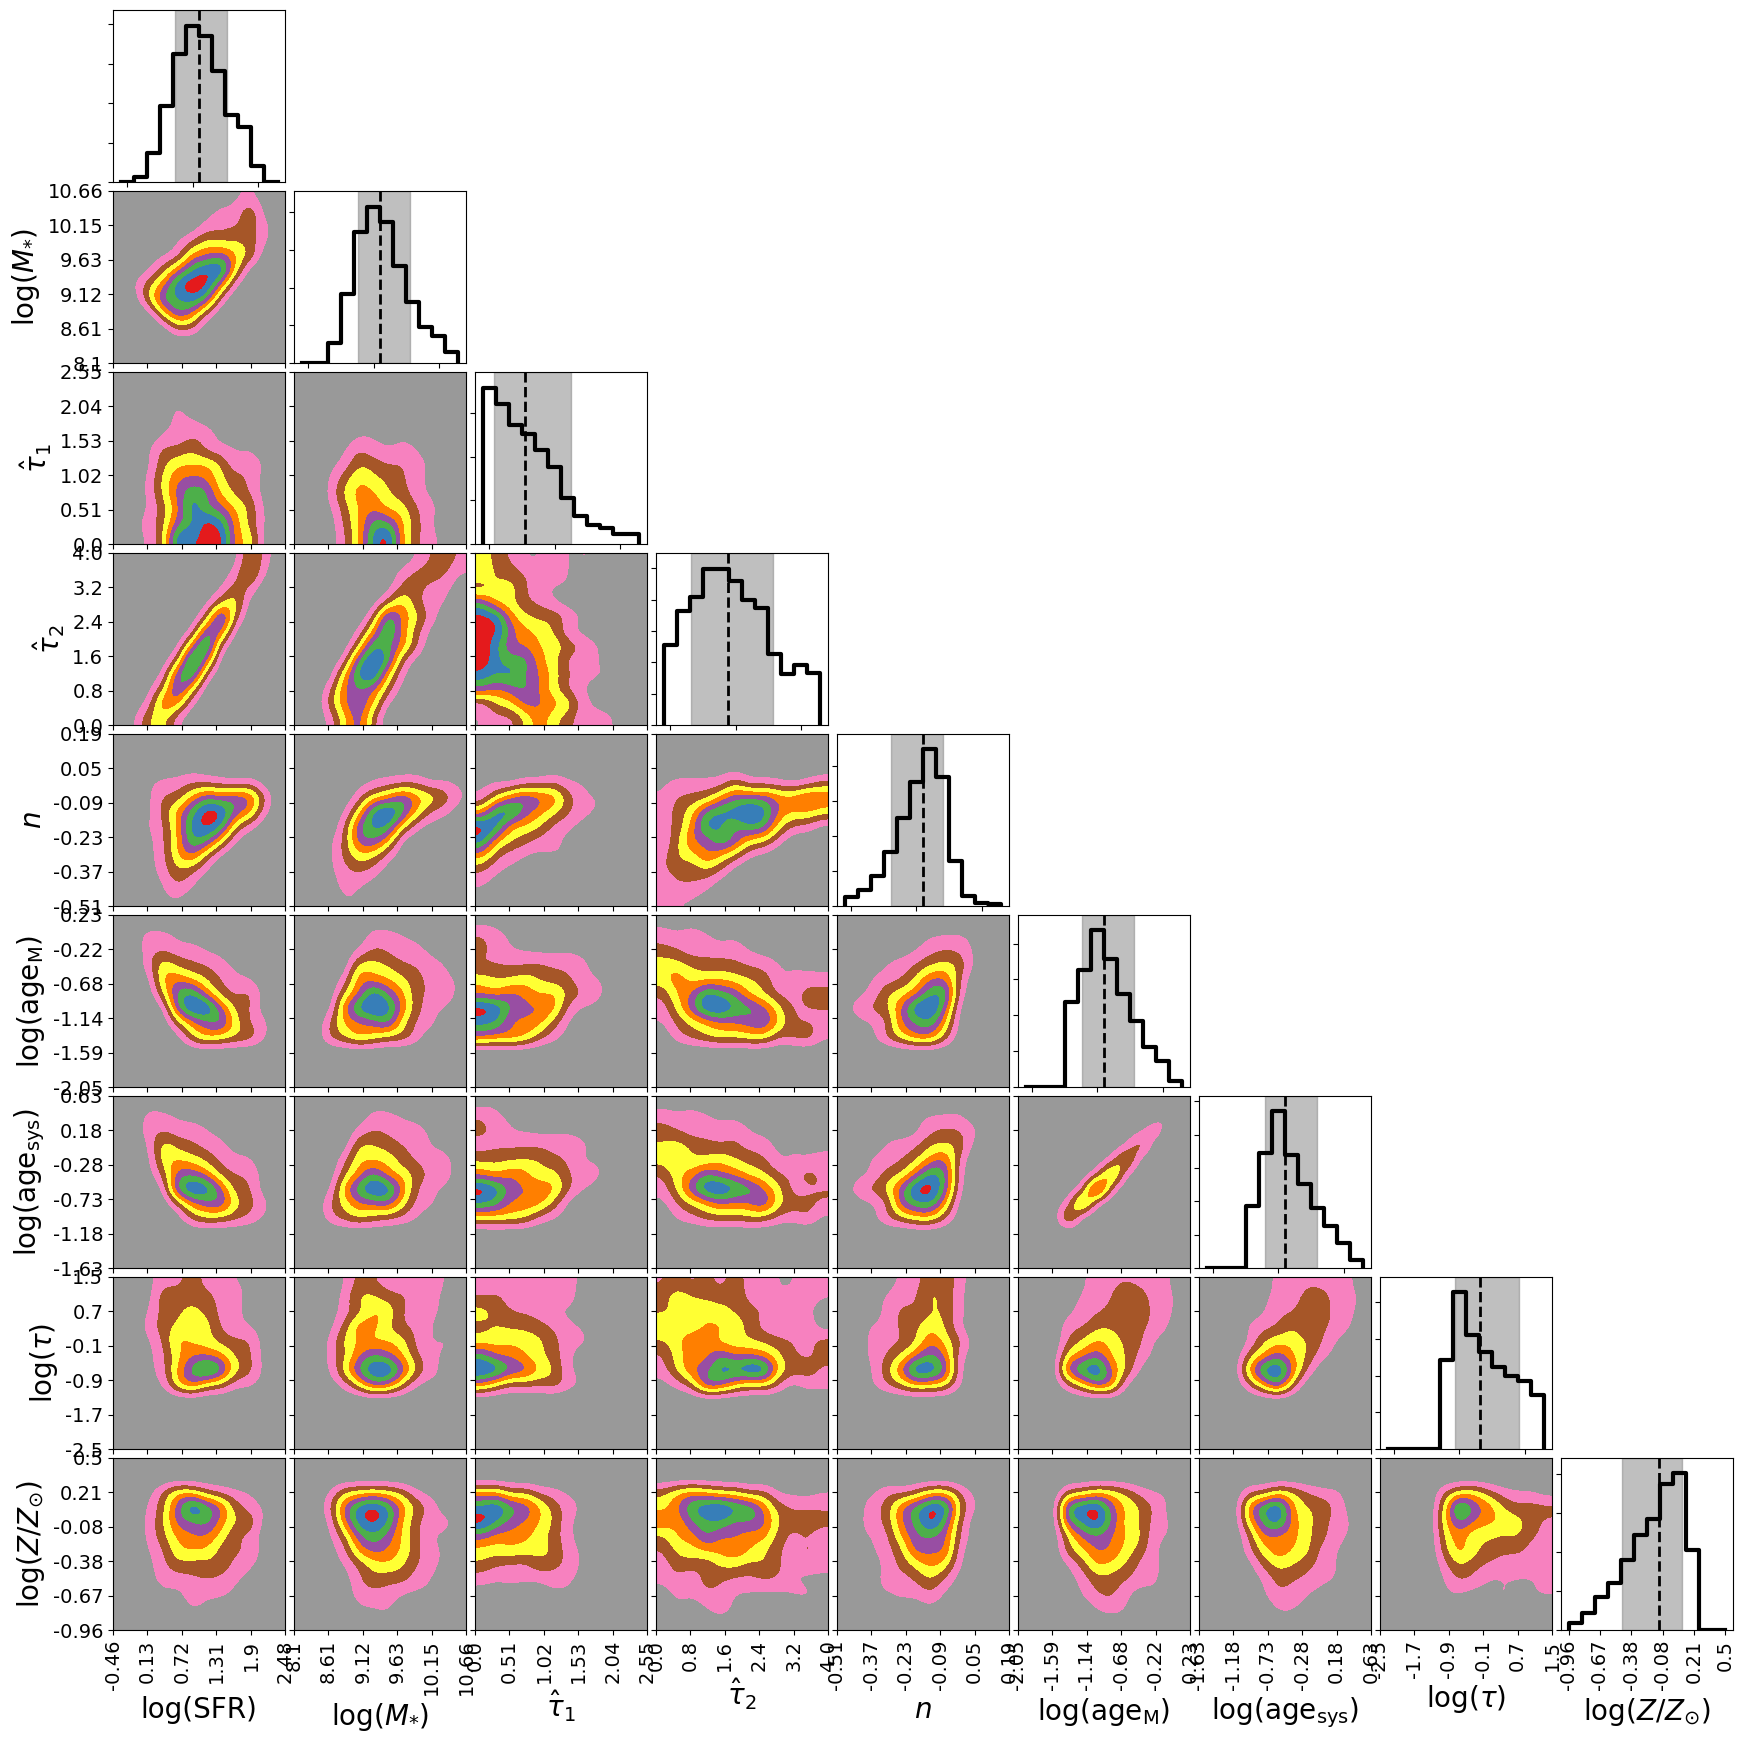

In [5]:
name_sampler_fits = 'mcmc_bin1.fits'
plot_corner(name_sampler_fits)

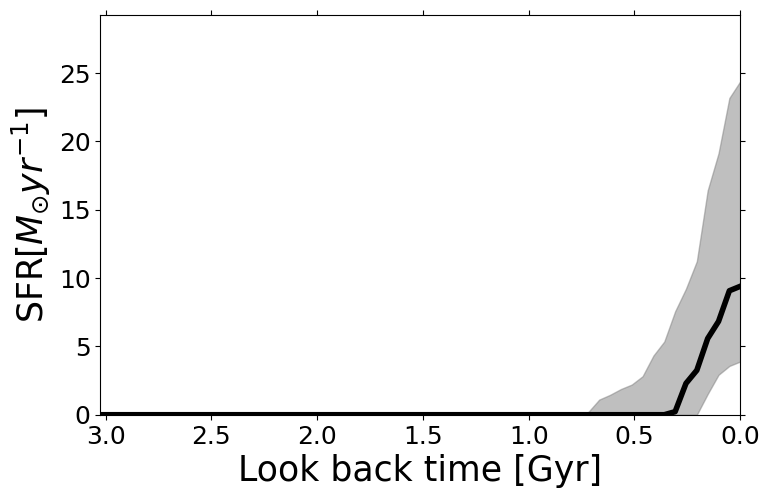

In [6]:
%matplotlib inline

name_sampler_fits = 'mcmc_bin1.fits'
sfh = plot_sfh_mcmc(name_sampler_fits)

### Fitting result of Bin index = 2

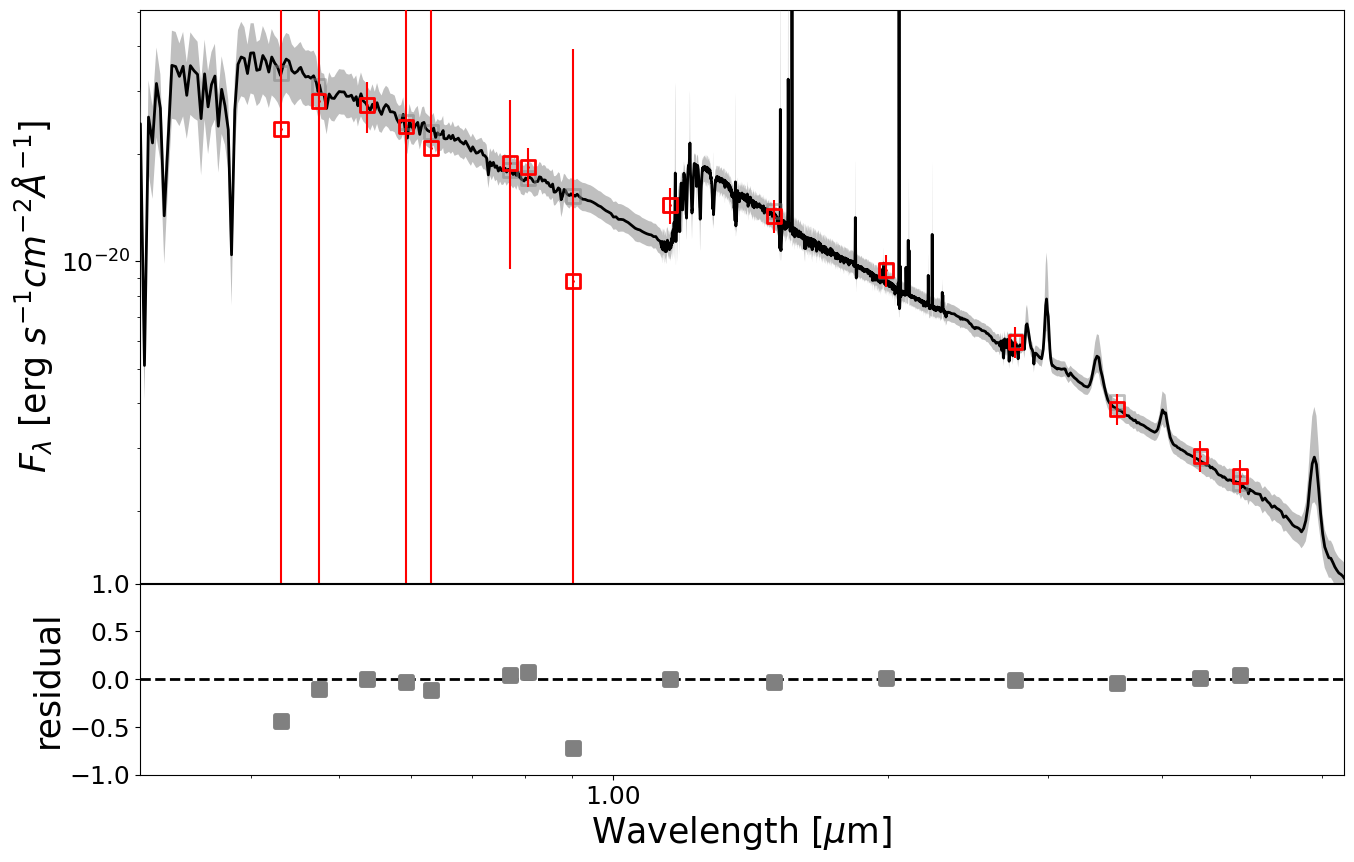

In [7]:
%matplotlib inline

name_sampler_fits = 'mcmc_bin2.fits'
plot_SED(name_sampler_fits, decompose=0)

Plotting posteriors probability distributions
=> Number of parameters: 9


'corner_mcmc_bin2.png'

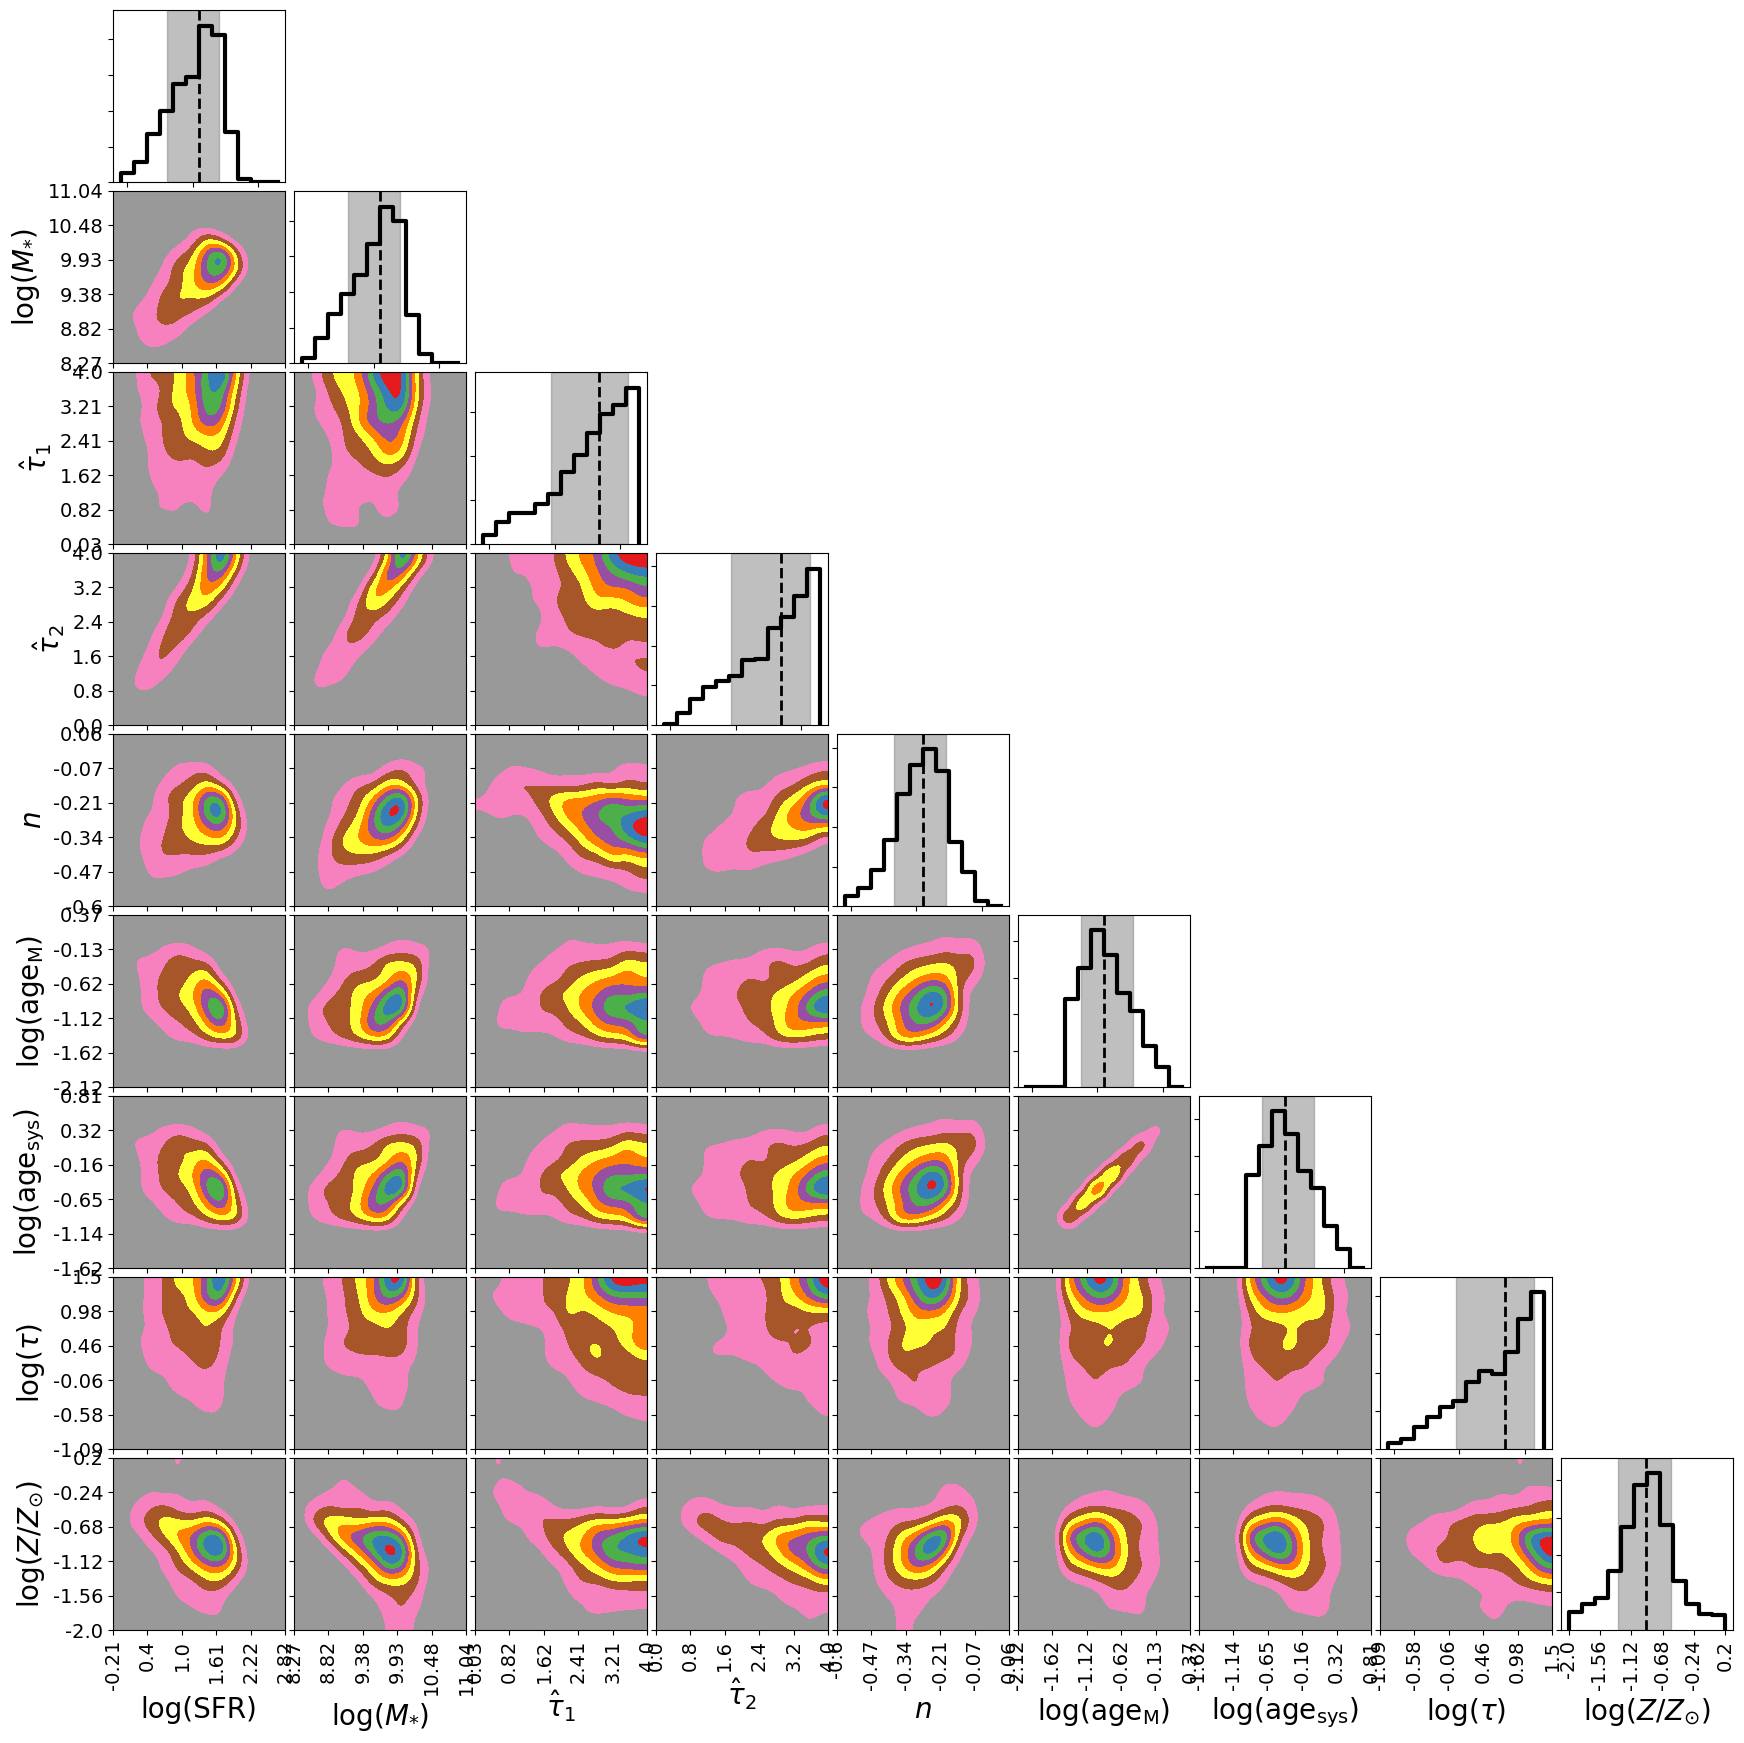

In [8]:
name_sampler_fits = 'mcmc_bin2.fits'
plot_corner(name_sampler_fits)

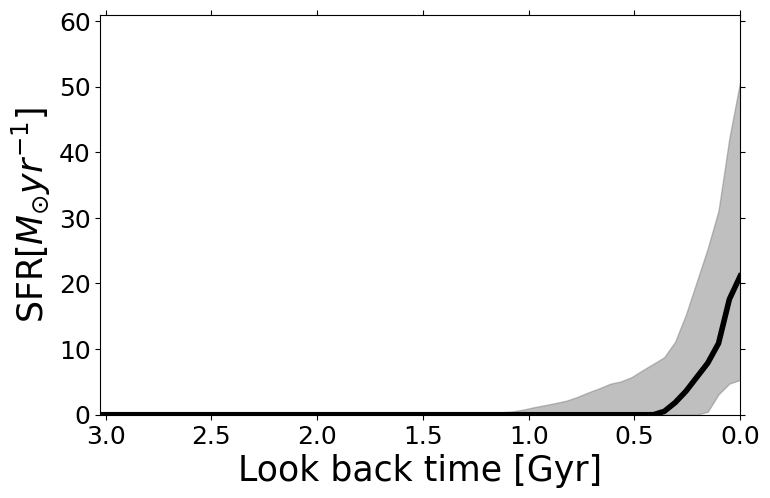

In [9]:
name_sampler_fits = 'mcmc_bin2.fits'
sfh = plot_sfh_mcmc(name_sampler_fits)

### Fitting result of Bin index = 3

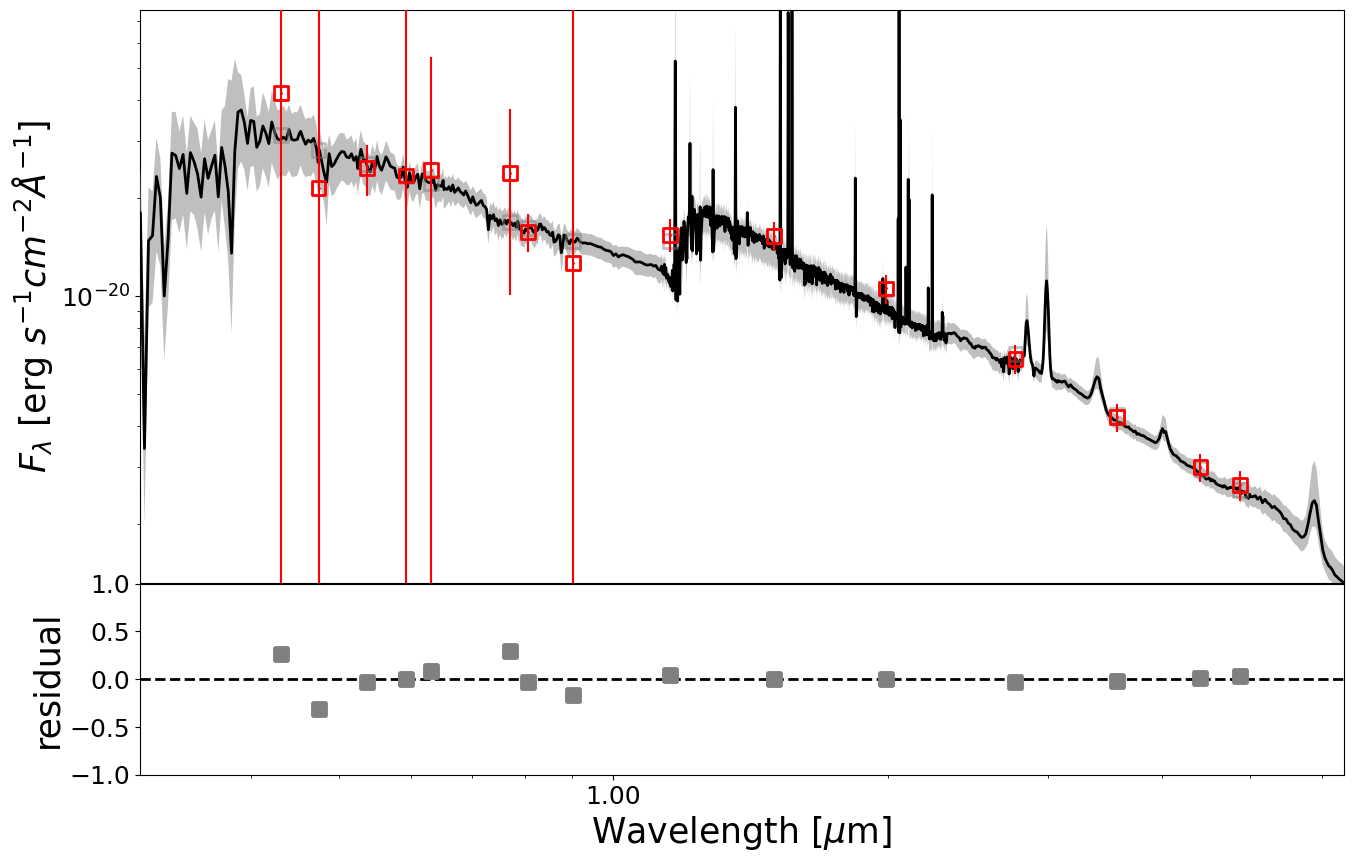

In [10]:
name_sampler_fits = 'mcmc_bin3.fits'
plot_SED(name_sampler_fits, decompose=0)

Plotting posteriors probability distributions
=> Number of parameters: 9


'corner_mcmc_bin3.png'

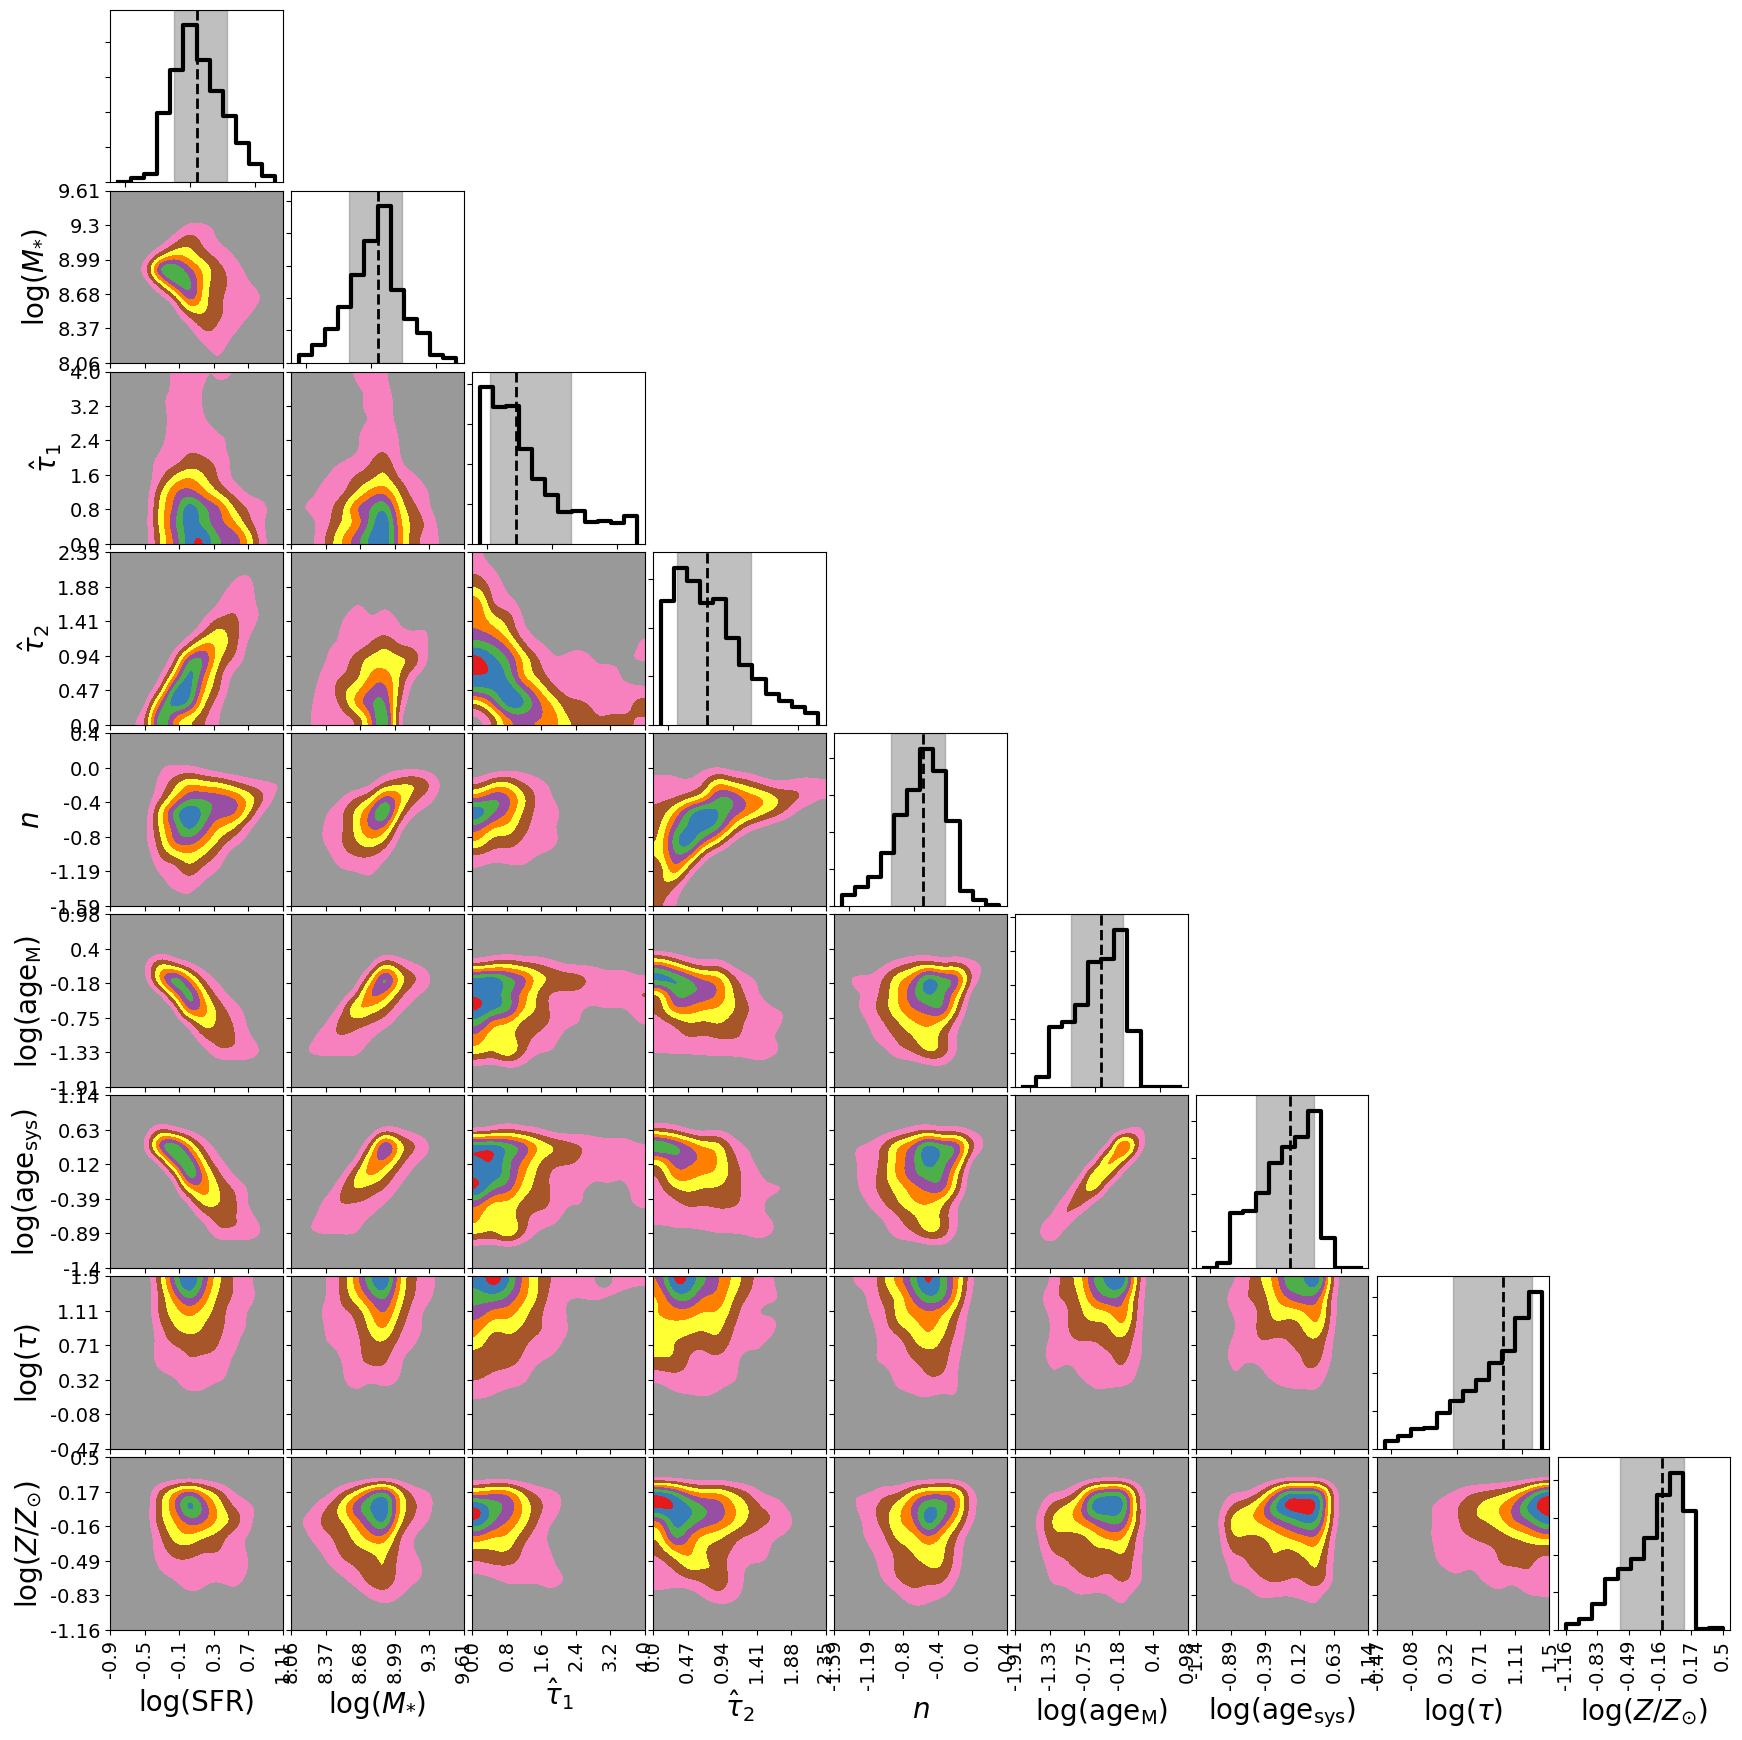

In [11]:
name_sampler_fits = 'mcmc_bin3.fits'
plot_corner(name_sampler_fits)

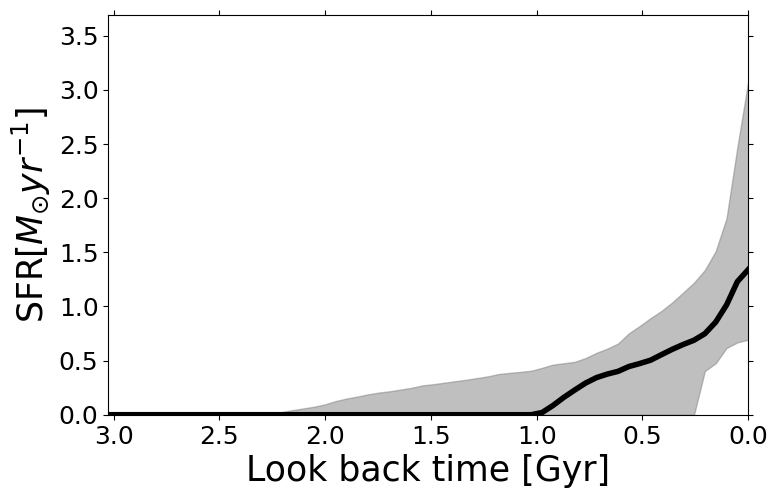

In [12]:
name_sampler_fits = 'mcmc_bin3.fits'
sfh = plot_sfh_mcmc(name_sampler_fits)